## Exploring with Visuals

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

# load datasets
all_08 = pd.read_csv('./DataSet/all_alpha_08_fixed_datatypes.csv')
all_18 = pd.read_csv('./DataSet/all_alpha_18_fixed_datatypes.csv')

In [2]:
all_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


##### Using histogram compare the distributions of greenhouse gas score in 2008 and 2018

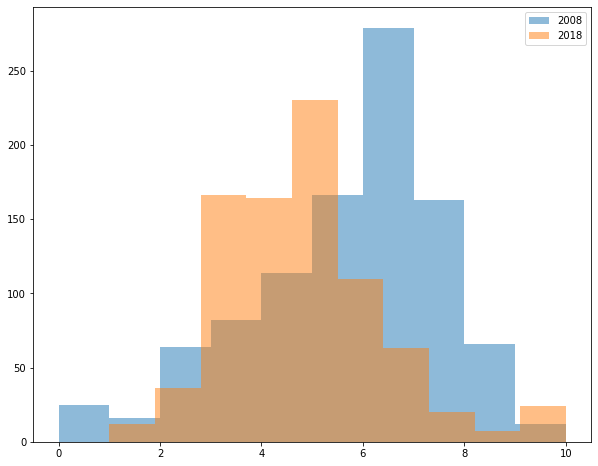

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(all_08.greenhouse_gas_score, alpha=0.5)
ax.hist(all_18.greenhouse_gas_score, alpha=0.5)
plt.legend(["2008", "2018"], loc="upper right");

#### Using histogram show how has the distribution of combined mpg changed from 2008 to 2018?

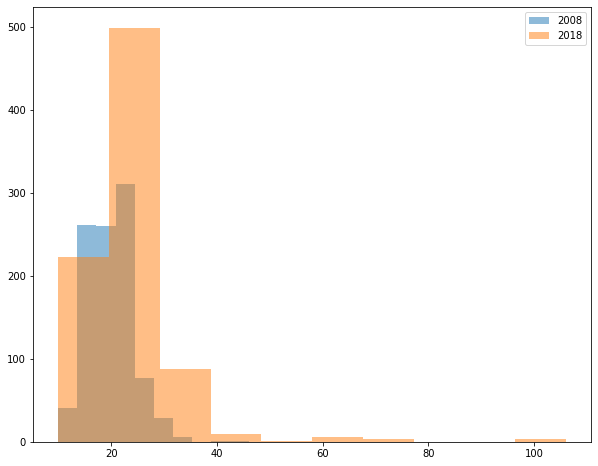

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(all_08.cmb_mpg, alpha=0.5)
ax.hist(all_18.cmb_mpg, alpha=0.5)
plt.legend(["2008", "2018"], loc="upper right");

#### Describe the correlation between displacement and combined mpg

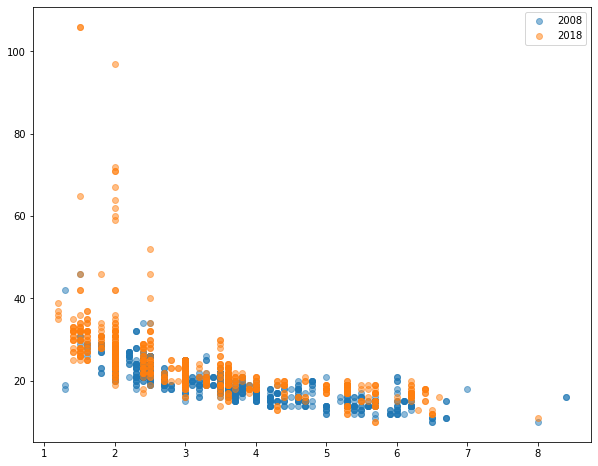

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(all_08.displ, all_08.cmb_mpg, alpha=0.5)
ax.scatter(all_18.displ, all_18.cmb_mpg, alpha=0.5)
plt.legend(["2008", "2018"], loc="upper right");

#### Describe the correlation between greenhouse gas score and combined mpg

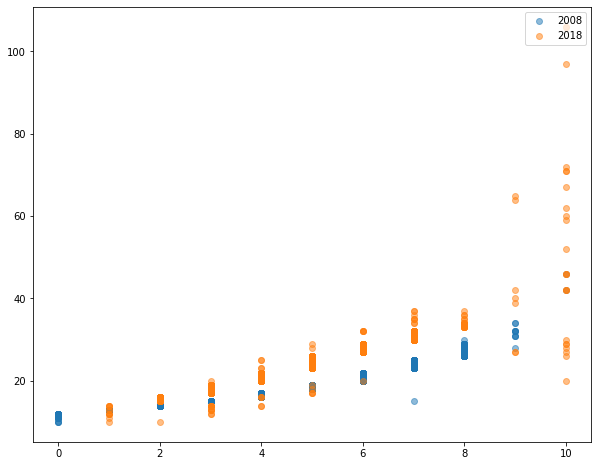

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(all_08.greenhouse_gas_score, all_08.cmb_mpg, alpha=0.5)
ax.scatter(all_18.greenhouse_gas_score, all_18.cmb_mpg, alpha=0.5)
plt.legend(["2008", "2018"], loc="upper right");

## Drawing Conclusions
  
Drawing conclusions and create visuals to communicate results!  
Drawing conclusion address the following questions.
- **Q1**: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
- **Q2**: How much have vehicle classes improved in fuel economy (increased in mpg)?
- **Q3**: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
- **Q4**: What features are associated with better fuel economy (mpg)? 

**Q1**

In [11]:
all_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [12]:
all_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in:
- 2008 are CNG, Ethanol, and gas
- 2018 Ethanol, Gas, Diesel, and Electricity

In [14]:
alternative_08_count = all_08.query("fuel in ['CNG', 'ethanol', 'gas']").model.nunique()
alternative_08_count

2

In [15]:
alternative_18_count = all_18.query("fuel in ['Ethanol', 'Gas', 'Diesel', 'Electricity']").model.nunique()
alternative_18_count

37

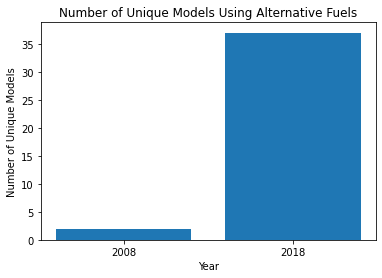

In [16]:
plt.bar(["2008", "2018"], [alternative_08_count, alternative_18_count])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased. We can also look at proportions.

In [18]:
# Calculating the proportions
proportion_08 = alternative_08_count / all_08.model.nunique()
proportion_18 = alternative_18_count / all_18.model.nunique()

# Checking the proportion values
proportion_08, proportion_18

(0.005305039787798408, 0.10364145658263306)

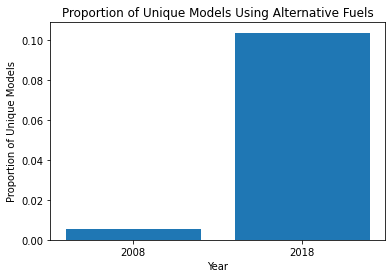

In [19]:
# Check the Visualization of Proportions
plt.bar(["2008", "2018"], [proportion_08, proportion_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

**Q2**

Let's look at the average fuel economy for each vehicle class for both years.

In [21]:
class_08 = all_08.groupby('veh_class').cmb_mpg.mean()
class_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [22]:
class_18 = all_18.groupby('veh_class').cmb_mpg.mean()
class_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [24]:
# Calculate change or the difference
amount_increased = class_18 - class_08
amount_increased

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [30]:
amount_increased.fillna(class_18, inplace=True)
amount_increased.dropna(inplace=True)
amount_increased

veh_class
large car           4.900000
midsize car         6.282609
minivan             1.682353
pickup              2.312635
small SUV          24.074074
small car           4.315948
special purpose    18.500000
standard SUV       18.197674
station wagon       5.162745
Name: cmb_mpg, dtype: float64

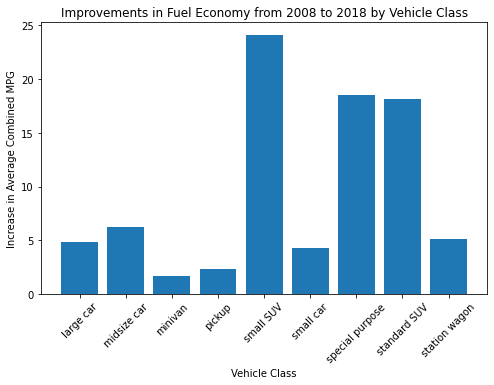

In [32]:
plt.subplots(figsize=(8, 5))
plt.bar(amount_increased.index, amount_increased)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xticks(rotation=45)
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

**Q3**

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [33]:
all_08.smartway.unique(), all_18.smartway.unique()

(array(['no', 'yes'], dtype=object),
 array(['No', 'Yes', 'Elite'], dtype=object))

In [35]:
smart_08 = all_08.query("smartway == 'yes'")
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [37]:
smart_18 = all_18.query("smartway in ['Yes', 'Elite']")
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [38]:
# Calculating the sum down the row
sum_smw_08 = smart_08[['cmb_mpg', 'greenhouse_gas_score']].sum(axis=0)
sum_smw_18 = smart_18[['cmb_mpg', 'greenhouse_gas_score']].sum(axis=0)

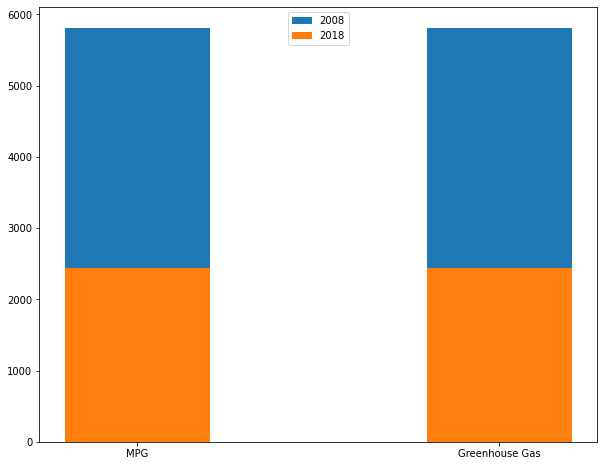

In [40]:
# Visualizing how much change there is in Both Datasets
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(['MPG', 'Greenhouse Gas'], sum_smw_08.mean(), label='2008', width=0.4)
ax.bar(['MPG', 'Greenhouse Gas'], sum_smw_18.mean(), label='2018', width=0.4)
ax.legend(loc="upper center");

**Q4**

We can explore the properties using the `pandas.plotting` module

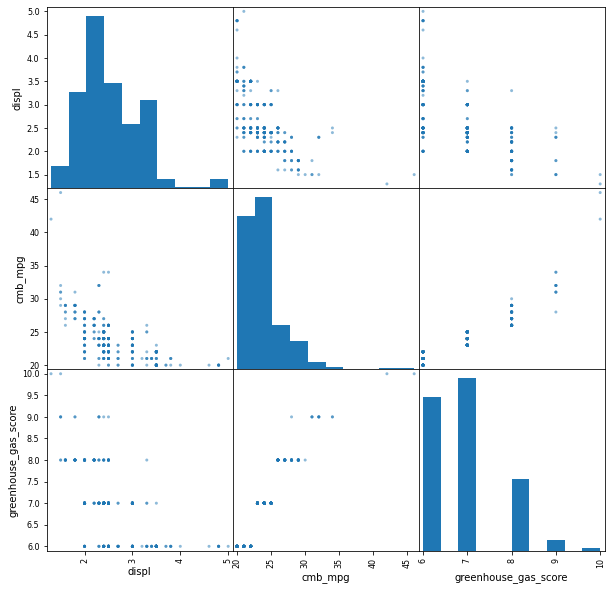

In [44]:
pd.plotting.scatter_matrix(smart_08[['displ', 'cmb_mpg', 'greenhouse_gas_score']], figsize=(10, 10));

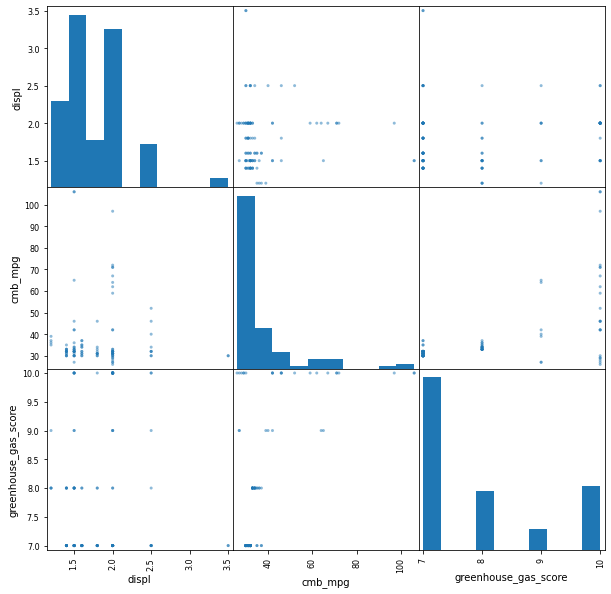

In [45]:
pd.plotting.scatter_matrix(smart_18[['displ', 'cmb_mpg', 'greenhouse_gas_score']], figsize=(10, 10));

**Q5: For all of the models that were produced in 2008 that are still being produced in 2018,**  
how much has the mpg improved and which vehicle improved the most?**  
  
Here are the steps for answering this question.  
1. Merge the datasets
2. Filter the dataset to have the combined mpgs only
3. Create a new column, mpg_change, with the change in mpg
4. Find the vehicle that improved the most

**NOTE** To check how to merge check the `Finally_Merging.ipynb` file

In [47]:
# Step 1
merged = pd.read_csv('./DataSet/Inner_Merged.csv')

In [49]:
# Step 2
model_mpg = merged.groupby('model')[['cmb_mpg_2008', 'cmb_mpg']].mean()
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [50]:
model_mpg['mpg_change'] = model_mpg.cmb_mpg - model_mpg.cmb_mpg_2008
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [51]:
# Step 4
model_mpg[model_mpg.mpg_change == model_mpg.mpg_change.max()]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
